# Section 1: clean the dataset

In [390]:
import pandas as pd

In [391]:
# Load dataset 
data = pd.read_csv('2013_Data2.csv')
data.head()


/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/2464419068.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2013_Data2.csv')


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20130125,2013,7,2013,1,25,205,471150112,400,10311,...,-1.0,0,AUD,NaN,277995,0,20130125,277995,20130125,49:58.7
1,20130513,2013,11,2013,5,13,205,277000801,200,10311,...,1.0,0,AUD,NaN,749295,0,20130513,867468,20130510,49:58.7
2,20130611,2013,12,2013,6,11,205,292314701,200,10350,...,2.0,0,AUD,NaN,756507,0,20130611,880839,20130611,49:58.7
3,20130111,2013,7,2013,1,11,205,299480703,200,10350,...,1.0,0,AUD,NaN,724149,0,20130111,821554,20130111,49:58.7
4,20130321,2013,9,2013,3,21,205,471150015,400,10364,...,6.0,0,AUD,NaN,738377,0,20130321,847171,20130320,49:58.7


In [392]:
# Basic information about dataset columns, datatypes, memory size.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accounting_date           951177 non-null  int64  
 1   fiscal_year               951177 non-null  int64  
 2   fiscal_month              951177 non-null  int64  
 3   calendar_year             951177 non-null  int64  
 4   calendar_month            951177 non-null  int64  
 5   calendar_day              951177 non-null  int64  
 6   company_code              951177 non-null  int64  
 7   customer_code             951177 non-null  object 
 8   customer_district_code    951177 non-null  int64  
 9   item_code                 951177 non-null  object 
 10  business_area_code        951177 non-null  object 
 11  item_group_code           951177 non-null  object 
 12  item_class_code           951177 non-null  object 
 13  item_type                 951177 non-null  i

## 1 .Check Null value

In [393]:
## Checking Null value in dataset.
data.isnull().sum()

accounting_date                  0
fiscal_year                      0
fiscal_month                     0
calendar_year                    0
calendar_month                   0
calendar_day                     0
company_code                     0
customer_code                    0
customer_district_code           0
item_code                        0
business_area_code               0
item_group_code                  0
item_class_code                  0
item_type                        0
bonus_group_code                 0
environment_group_code           0
technology_group_code            0
commission_group_code            0
reporting_classification         0
light_source                     0
warehouse_code                   0
abc_class_code                   0
abc_class_volume                 0
business_chain_l1_code           0
business_chain_l1_name           0
contact_method_code              0
salesperson_code                 0
order_type_code                  0
market_segment      

- In the entire dataset there is no any null value present expect item_source_class colums. Now inspecting the item_source_class column contining large  number of null value.

In [394]:
data['item_source_class']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
951172   NaN
951173   NaN
951174   NaN
951175   NaN
951176   NaN
Name: item_source_class, Length: 951177, dtype: float64

- Column contain only null value, best idea is to delete the columns because it donot contibute any things to our analysis.

In [395]:
## Drop the item_source_class
data.drop('item_source_class', axis=1, inplace=True)

## 2. Check duplicate Value

In [396]:
data.duplicated().sum()

3378

In [397]:
data[data.duplicated()]

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
1600,20130424,2013,10,2013,4,24,205,200001500,200,10059,...,2.7885,5.0,0,AUD,745438,0,20130424,860493,20130424,49:58.7
1719,20130522,2013,11,2013,5,22,205,254800200,200,11227,...,1.7970,10.0,0,AUD,751509,0,20130522,872026,20130521,49:58.7
2174,20130109,2013,7,2013,1,9,205,304200200,300,11227,...,1.8360,10.0,0,AUD,723480,0,20130109,820248,20130108,49:58.7
2909,20130225,2013,8,2013,2,25,205,525100100,500,11227,...,1.8310,10.0,0,AUD,282940,0,20130225,837420,20130225,49:58.7
4171,20130426,2013,10,2013,4,26,205,623000400,600,11277,...,22.8264,3.0,0,AUD,289192,0,20130426,860755,20130424,49:58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947991,20130919,2014,3,2013,9,19,205,502988001,500,BWP/T236H,...,63.0000,2.0,0,AUD,2408807,2,20130919,3042762,20130812,49:58.7
948306,20130816,2014,2,2013,8,16,101,200000000,200,JS97Q01,...,21295.1000,250.0,0,AUS,822811,0,20130816,1503017,20130816,49:58.7
949115,20131018,2014,4,2013,10,18,205,478000711,410,27099,...,88.0240,10.0,0,AUD,309571,0,20131018,938028,20131018,49:58.7
950645,20131018,2014,4,2013,10,18,950,Z85033902,535,603356NZ,...,16.2200,50.0,0,NZD,149953,2,20131018,3068879,20131015,49:58.7


- Around 3378 datapoint contain duplicate value in 951177 point which is very less in comparison to entire datapoint best decision is to delete the duplicate element because removing duplicate ensure the quality and integity of the data.

In [398]:
# Delete duplicate value.
data.drop_duplicates(inplace=True)

In [399]:
data.duplicated().sum()

0

In [400]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20130125,2013,7,2013,1,25,205,471150112,400,10311,...,-1.270,-1.0,0,AUD,277995,0,20130125,277995,20130125,49:58.7
1,20130513,2013,11,2013,5,13,205,277000801,200,10311,...,1.270,1.0,0,AUD,749295,0,20130513,867468,20130510,49:58.7
2,20130611,2013,12,2013,6,11,205,292314701,200,10350,...,22.970,2.0,0,AUD,756507,0,20130611,880839,20130611,49:58.7
3,20130111,2013,7,2013,1,11,205,299480703,200,10350,...,11.485,1.0,0,AUD,724149,0,20130111,821554,20130111,49:58.7
4,20130321,2013,9,2013,3,21,205,471150015,400,10364,...,28.140,6.0,0,AUD,738377,0,20130321,847171,20130320,49:58.7


## Divide categorical and Numerical column column in different dataframe so that easy to Clean.

In [401]:
categorical_column=[col for col in data.columns if data[col].dtype=='O']
categorical_column

['customer_code',
 'item_code',
 'business_area_code',
 'item_group_code',
 'item_class_code',
 'bonus_group_code',
 'environment_group_code',
 'technology_group_code',
 'commission_group_code',
 'reporting_classification',
 'light_source',
 'warehouse_code',
 'abc_class_code',
 'abc_class_volume',
 'business_chain_l1_code',
 'business_chain_l1_name',
 'contact_method_code',
 'salesperson_code',
 'order_type_code',
 'market_segment',
 'currency',
 'customer_order_number',
 'dss_update_time']

In [402]:
cat_df=data[categorical_column]
cat_df.head()

,customer_code,item_code,business_area_code,item_group_code,item_class_code,bonus_group_code,environment_group_code,technology_group_code,commission_group_code,reporting_classification,...,abc_class_volume,business_chain_l1_code,business_chain_l1_name,contact_method_code,salesperson_code,order_type_code,market_segment,currency,customer_order_number,dss_update_time
0,471150112,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,T432,CRR,Commercial & Industrial,AUD,277995,49:58.7
1,277000801,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,J,AEG,Aussie Energy Group,NA,P237,NOR,Commercial & Industrial,AUD,867468,49:58.7
2,292314701,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,NES,NextGen Electrical Solutions,NA,T203,NOR,Commercial & Industrial,AUD,880839,49:58.7
3,299480703,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,P248,NOR,Commercial & Industrial,AUD,821554,49:58.7
4,471150015,10364,COM,COM03002,COM03,Trade,C,220,NET_SALES,Continuing,...,J,MED,Metro Electrical Distributors,NA,T612,NOR,Commercial & Industrial,AUD,847171,49:58.7


In [403]:
numerical_column=[col for col in data.columns if data[col].dtype!='O']
numerical_column

['accounting_date',
 'fiscal_year',
 'fiscal_month',
 'calendar_year',
 'calendar_month',
 'calendar_day',
 'company_code',
 'customer_district_code',
 'item_type',
 'value_sales',
 'value_cost',
 'value_quantity',
 'value_price_adjustment',
 'invoice_number',
 'line_number',
 'invoice_date',
 'order_date']

In [404]:
num_df=data[numerical_column]
num_df.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_number,line_number,invoice_date,order_date
0,20130125,2013,7,2013,1,25,205,400,5,-2.23,-1.270,-1.0,0,277995,0,20130125,20130125
1,20130513,2013,11,2013,5,13,205,200,5,2.48,1.270,1.0,0,749295,0,20130513,20130510
2,20130611,2013,12,2013,6,11,205,200,5,53.40,22.970,2.0,0,756507,0,20130611,20130611
3,20130111,2013,7,2013,1,11,205,200,5,24.90,11.485,1.0,0,724149,0,20130111,20130111
4,20130321,2013,9,2013,3,21,205,400,5,45.00,28.140,6.0,0,738377,0,20130321,20130320


In [405]:
cat_df.head()

,customer_code,item_code,business_area_code,item_group_code,item_class_code,bonus_group_code,environment_group_code,technology_group_code,commission_group_code,reporting_classification,...,abc_class_volume,business_chain_l1_code,business_chain_l1_name,contact_method_code,salesperson_code,order_type_code,market_segment,currency,customer_order_number,dss_update_time
0,471150112,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,T432,CRR,Commercial & Industrial,AUD,277995,49:58.7
1,277000801,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,J,AEG,Aussie Energy Group,NA,P237,NOR,Commercial & Industrial,AUD,867468,49:58.7
2,292314701,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,NES,NextGen Electrical Solutions,NA,T203,NOR,Commercial & Industrial,AUD,880839,49:58.7
3,299480703,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,P248,NOR,Commercial & Industrial,AUD,821554,49:58.7
4,471150015,10364,COM,COM03002,COM03,Trade,C,220,NET_SALES,Continuing,...,J,MED,Metro Electrical Distributors,NA,T612,NOR,Commercial & Industrial,AUD,847171,49:58.7


In [406]:
# Customer code is unique identifer to customer involve in transcation.
len(cat_df['customer_code'].unique())

3915

In [407]:
## item code: unique identifer for items being sold.
len(cat_df['item_code'].unique()) 

23281

In [408]:
# Business_area_code:  code representing the specific area of business related to the transaction.
cat_df['business_area_code'].unique()

array(['COM                           ', 'OTH                           ',
       'SUR                           ', 'LMP                           ',
       'PEN                           ', '940',
       'TRO                           ', 'DLT                           ',
       'TAL                           ', '970', '999', '980',
       'FLD                           ', 'URB                           ',
       'IAE                           ', '985',
       'LCP                           ', 'IAI                           ',
       '920', 'SAE                           ',
       'EXL                           ', 'HLB                           ',
       '950', 'RWY                           ', '945', '910', '960',
       '930'], dtype=object)

- To remove extraspace. 

In [409]:
# Removing unwanted spacing from columns
data['business_area_code']=data['business_area_code'].str.strip()

In [410]:
# Removing Unwanted spacing from columns.
data['environment_group_code']=data['environment_group_code'].str.strip()

In [411]:
data['business_area_code'].unique()

array(['COM', 'OTH', 'SUR', 'LMP', 'PEN', '940', 'TRO', 'DLT', 'TAL',
       '970', '999', '980', 'FLD', 'URB', 'IAE', '985', 'LCP', 'IAI',
       '920', 'SAE', 'EXL', 'HLB', '950', 'RWY', '945', '910', '960',
       '930'], dtype=object)

In [412]:
cat_df['business_area_code'].value_counts()

business_area_code
LMP                               398958
SUR                               187901
COM                                98745
OTH                                80815
DLT                                50689
FLD                                43976
TAL                                15308
TRO                                15305
SAE                                14687
URB                                11762
RWY                                 9414
HLB                                 8164
PEN                                 4334
LCP                                 3113
980                                 1248
EXL                                 1140
970                                  434
940                                  418
920                                  365
999                                  209
910                                  188
950                                  160
985                                  146
IAI                                  1

- In the business are code specific business related to transcation are categorical but some suspicious category like 980, 970, 999, 950 have less point and do not make any sense in the dataset.

- To Resolve This problem: Best decision to delete the numerical categorical in the column. 

In [413]:
data[data['business_area_code']=='980']

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
8987,20130211,2013,8,2013,2,11,205,264000500,200,10676,...,1.5200,2.0,0,AUD,729882,0,20130211,831868,20130211,49:58.7
25645,20130625,2013,12,2013,6,25,205,214100100,710,19892,...,0.0000,126.0,0,AUD,295884,0,20130625,887701,20130625,49:58.7
33051,20130502,2013,11,2013,5,2,205,736433203,310,15038,...,20.5009,1.0,0,AUD,747190,0,20130502,863002,20130501,49:58.7
33052,20130225,2013,8,2013,2,25,205,267401403,200,15038,...,41.0018,2.0,0,AUD,733103,0,20130225,837103,20130222,49:58.7
33053,20130305,2013,9,2013,3,5,205,291500001,200,15038,...,20.5009,1.0,0,AUD,734673,0,20130305,840369,20130304,49:58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945072,20131011,2014,4,2013,10,11,205,214100100,710,21282,...,0.0000,48.0,0,AUD,308902,0,20131011,935064,20131011,49:58.7
949405,20130725,2014,1,2013,7,25,205,412300501,400,25988,...,40.9536,4.0,0,AUD,768404,0,20130725,901298,20130724,49:58.7
949409,20130716,2014,1,2013,7,16,205,292314701,200,25988,...,40.9536,4.0,0,AUD,765950,0,20130716,896760,20130715,49:58.7
949414,20130806,2014,2,2013,8,6,205,411900201,410,25988,...,102.3840,10.0,0,AUD,771125,0,20130806,906625,20130806,49:58.7


In [414]:
# droping the 980 category. 
data.drop(data[data['business_area_code']=='980'].index, inplace=True)

In [415]:
data[data['business_area_code']=='980']

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time


In [416]:
## IN the same way deleting the 980, 970, 999, 950... category of business_area_code.
data.drop(data[data['business_area_code']=='970'].index, inplace=True)
data.drop(data[data['business_area_code']=='940'].index, inplace=True)
data.drop(data[data['business_area_code']=='920'].index, inplace=True)
data.drop(data[data['business_area_code']=='999'].index, inplace=True)
data.drop(data[data['business_area_code']=='910'].index, inplace=True)
data.drop(data[data['business_area_code']=='950'].index, inplace=True)
data.drop(data[data['business_area_code']=='955'].index, inplace=True)
data.drop(data[data['business_area_code']=='960'].index, inplace=True)
data.drop(data[data['business_area_code']=='930'].index, inplace=True)

In [417]:
data.drop(data[data['business_area_code']=='985'].index, inplace=True)
data.drop(data[data['business_area_code']=='945'].index, inplace=True)

In [418]:
data['business_area_code'].value_counts()

business_area_code
LMP    398958
SUR    187901
COM     98745
OTH     80815
DLT     50689
FLD     43976
TAL     15308
TRO     15305
SAE     14687
URB     11762
RWY      9414
HLB      8164
PEN      4334
LCP      3113
EXL      1140
IAI       134
IAE        49
Name: count, dtype: int64

In [419]:
cat_df.head()

,customer_code,item_code,business_area_code,item_group_code,item_class_code,bonus_group_code,environment_group_code,technology_group_code,commission_group_code,reporting_classification,...,abc_class_volume,business_chain_l1_code,business_chain_l1_name,contact_method_code,salesperson_code,order_type_code,market_segment,currency,customer_order_number,dss_update_time
0,471150112,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,T432,CRR,Commercial & Industrial,AUD,277995,49:58.7
1,277000801,10311,COM,COM90001,COM90,Trade,C,CROM,NET_SALES,Continuing,...,J,AEG,Aussie Energy Group,NA,P237,NOR,Commercial & Industrial,AUD,867468,49:58.7
2,292314701,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,NES,NextGen Electrical Solutions,NA,T203,NOR,Commercial & Industrial,AUD,880839,49:58.7
3,299480703,10350,OTH,999,14001,Trade,C,NA,NET_SALES,Continuing,...,U,MED,Metro Electrical Distributors,NA,P248,NOR,Commercial & Industrial,AUD,821554,49:58.7
4,471150015,10364,COM,COM03002,COM03,Trade,C,220,NET_SALES,Continuing,...,J,MED,Metro Electrical Distributors,NA,T612,NOR,Commercial & Industrial,AUD,847171,49:58.7


In [420]:
data['bonus_group_code']=data['bonus_group_code'].str.strip()

In [421]:
cat_df['item_group_code'].unique()

array(['COM90001                      ', '999',
       'COM03002                      ', 'SUR01001                      ',
       'LMP05003                      ', 'LMP04002                      ',
       'PEN01001                      ', 'LMP05017                      ',
       '704', 'LMP05002                      ',
       'COM99001                      ', 'LMP02001                      ',
       'LMP05025                      ', 'LMP05014                      ',
       'LMP04006                      ', 'LMP05026                      ',
       'LMP03002                      ', 'COM17001                      ',
       'TRO01001                      ', 'DLT02002                      ',
       'DLT01002                      ', 'LMP03007                      ',
       'LMP03008                      ', 'LMP05023                      ',
       'LMP03001                      ', 'LMP06003                      ',
       'LMP03015                      ', 'SUR90001                      ',
    

In [422]:
# Total item 
len(cat_df['item_group_code'].unique())

510

- There are 510 unique category items belong to.

In [423]:
data['item_class_code'].value_counts()

item_class_code
LMP05                             99638
LMP04                             90325
14001                             80815
LMP03                             68087
LMP01                             61933
                                  ...  
IAI09                                 1
EXL05                                 1
IAI05                                 1
IAI08                                 1
IAI11                                 1
Name: count, Length: 132, dtype: int64

In [424]:
data.drop('item_class_code', axis=1, inplace=True)

In [425]:
#Bonus group code: A code indicating the group to which the item belongs.
# Unique category in bonus_group_code.
cat_df['bonus_group_code'].unique()

array(['Trade          ', 'Professional   '], dtype=object)

- Bonus group code have  extra space issue to fix This strip to remove extra space. 

In [426]:
cat_df['bonus_group_code']=cat_df['bonus_group_code'].str.strip()

/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/731277645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bonus_group_code']=cat_df['bonus_group_code'].str.strip()


In [427]:
cat_df['bonus_group_code'].unique()

array(['Trade', 'Professional'], dtype=object)

In [428]:
data['bonus_group_code'].value_counts()

bonus_group_code
Trade           782557
Professional    161937
Name: count, dtype: int64

In [429]:
cat_df['environment_group_code'].unique()

array(['C                             ', 'S                             ',
       'P                             ', 'R                             ',
       'Z                             ', 'I                             ',
       'NA                            ', 'M                             ',
       'D                             '], dtype=object)

In [430]:
cat_df['environment_group_code'].value_counts()

environment_group_code
C                                 365772
S                                 230604
P                                 213064
R                                  89951
Z                                  47808
D                                    300
I                                    200
M                                     72
NA                                    28
Name: count, dtype: int64

In [431]:
cat_df['technology_group_code'].unique()

array(['CROM                                    ',
       'NA                                      ', '220', '86', '76',
       '219', 'PIER                                    ', '78', '206',
       'SYLV                                    ', '68', '85', '198',
       '90', 'PNZ                                     ', '130', '96',
       '500', 'INZ                                     ', '61', '215',
       '360', '380', 'GLG                                     ', '100',
       'CSE                                     ', '545', '225', '420',
       '217', '210', '320', '540', '460', '570', '565', '480', '580',
       '214', '830', '555', '330', '290', '280', '999', '760', '310',
       '400', '110', '560', '213', '160', '800', '440', '92', '600',
       '850', '70', 'SCHR                                    ', '102',
       '82', '300', '740', '181', '350', '520', '98', '415', '720', '340',
       '780', '108', '550', '240',
       'FGDFT                                   ', '123', '595'

In [432]:
data.drop('technology_group_code', inplace=True, axis=1)

In [433]:
cat_df['commission_group_code'].unique()

array(['NET_SALES                     ', 'REBATE_EXEMPT_EOL             ',
       'REBATE_EXEMPT_TP              '], dtype=object)

- Extra spacing isssue so reslove this strip category.

In [434]:
data['commission_group_code']=data['commission_group_code'].str.strip()

In [435]:
data['commission_group_code'].unique()

array(['NET_SALES', 'REBATE_EXEMPT_EOL', 'REBATE_EXEMPT_TP'], dtype=object)

In [436]:
data['commission_group_code'].value_counts()

commission_group_code
NET_SALES            897678
REBATE_EXEMPT_EOL     45426
REBATE_EXEMPT_TP       1390
Name: count, dtype: int64

In [437]:
cat_df['reporting_classification'].value_counts()

reporting_classification
Discontinuing    670406
Continuing       277393
Name: count, dtype: int64

In [438]:
categorical_column

['customer_code',
 'item_code',
 'business_area_code',
 'item_group_code',
 'item_class_code',
 'bonus_group_code',
 'environment_group_code',
 'technology_group_code',
 'commission_group_code',
 'reporting_classification',
 'light_source',
 'warehouse_code',
 'abc_class_code',
 'abc_class_volume',
 'business_chain_l1_code',
 'business_chain_l1_name',
 'contact_method_code',
 'salesperson_code',
 'order_type_code',
 'market_segment',
 'currency',
 'customer_order_number',
 'dss_update_time']

In [439]:
cat_df['light_source'].unique()

array(['Accessories', 'Traditional', 'LED'], dtype=object)

In [440]:
cat_df['warehouse_code'].unique()

array(['Unk', '5N2', '5S0', '5Q0', '5V0', '5W0', '1N0', '1V0', '1Q0',
       '1N1', '1S0', '1W0', '1Q1', '1S1', '5T0', '5S1', 'FA1', 'FWE',
       'FA2', 'FW2', 'FWA', '5N1', '5Q1', '1T0', '1T1', 'EN0', 'BB1',
       '1N2', '1N3'], dtype=object)

In [441]:
cat_df['abc_class_code'].unique()

array(['U', 'J', 'I', 'E', 'C', 'A', 'D', 'G', 'B', 'F'], dtype=object)

In [442]:
cat_df['abc_class_volume'].unique()

array(['U', 'J', 'E', 'I', 'D', 'A', 'B', 'C', 'H', 'G'], dtype=object)

In [443]:
cat_df['business_chain_l1_code'].unique()

array(['MED', 'AEG', 'NES', 'ZZ2       ', 'NLG', 'ZZ8       ', 'ELC',
       'ZZ3       ', 'BPS', 'ZZZ       ', 'INTERCO   ', 'ZZ6       ',
       'ZZ1       ', 'UES', 'GEW', 'Z3500     ', 'Z4000     ',
       'Z2000     ', 'Z4500     ', 'Z8500     ', 'Z4100     ',
       'ZZ7       ', 'ZZ5       ', 'Z6100     ', 'Z850339   ',
       'CET       ', 'PTD', 'Z6500     ', 'ZZ9       ', 'ZI900     ',
       'ZI4000    ', 'Z7500     ', 'ZI800     ', 'ZI4500    ',
       'Z3200     ', 'ZA900     ', 'ZI2000    ', 'Z850358   ',
       'Z8100     ', 'Z6800     ', 'ZI3500    ', 'ZI3000    ',
       'ZA800     ', 'Z9000     ', 'ZA200     ', 'ZI80084   ',
       'REP       '], dtype=object)

In [444]:
data.drop('business_chain_l1_code',axis=1, inplace=True)

In [445]:
cat_df['business_chain_l1_name'].unique()

array(['Metro Electrical Distributors', 'Aussie Energy Group',
       'NextGen Electrical Solutions',
       'Independent Retailers Association', 'Nationwide Lighting Group',
       'EndUser Solutions', 'ElectraCorp Ltd', 'ProLighting Specialists',
       'BrightPower Solutions', 'General Suppliers Pty',
       'InterGlobal Trading', 'Constructor Supplies',
       'Builders Supply Network', 'Unified Electrical Suppliers',
       'Global Electric Wholesalers', 'Corys Energy Systems',
       'Russell & Partners Electric', 'Ideal Electrical Solutions',
       'PowerHub Distribution', 'Independent Traders Ltd',
       'Stewart Electrical Wholesalers', 'UtilityWorks Group',
       'Beacon Lighting Supplies', 'Active Electric Solutions',
       'CetraPro Distributors', 'PowerTools Direct', 'MitrePro Suppliers',
       'Corporate Builders Consortium', 'Inlite NZ Ltd',
       'Russell & Radcliffe Electric', 'DIY Supplies Network',
       'Inlite Solutions', 'CraneCo Distribution',
       'Head

In [446]:
cat_df['business_chain_l1_name'].value_counts()

business_chain_l1_name
Metro Electrical Distributors        208910
Builders Supply Network              121557
NextGen Electrical Solutions          85491
BrightPower Solutions                 83867
Independent Retailers Association     74095
ElectraCorp Ltd                       49820
InterGlobal Trading                   43080
Nationwide Lighting Group             41680
ProLighting Specialists               38232
Aussie Energy Group                   33793
General Suppliers Pty                 29606
EndUser Solutions                     23602
Unified Electrical Suppliers          22005
MitrePro Suppliers                    15262
DIY Supplies Network                  13975
Global Electric Wholesalers           12013
Russell & Partners Electric           10145
Independent Traders Ltd                9146
UtilityWorks Group                     4704
PowerTools Direct                      4067
PowerHub Distribution                  3387
Corporate Builders Consortium          3236
Corys Ene

In [447]:
len(cat_df['contact_method_code'].unique())

1274

In [448]:
data.drop('contact_method_code', axis=1, inplace=True)

In [449]:
len(cat_df['salesperson_code'].unique())

218

In [450]:
cat_df['order_type_code'].unique()

array(['CRR', 'NOR', 'CRD', 'PRO', 'CSH', 'PRD', 'PPO', 'EXP', 'PUP',
       'CDG', 'EDI', 'ZCR', 'NOS', 'NOH', 'AES', 'CPR', 'ZCG', 'SPC',
       'EDS', 'PMO', 'CRP', 'COP', 'MIN', 'PSA', 'SPL', 'COA', '5TN',
       'WDC', 'PPD', 'OBS', 'CSO', 'PME'], dtype=object)

In [451]:
cat_df['market_segment'].unique()

array(['Commercial & Industrial'], dtype=object)

In [452]:
data.drop('market_segment', inplace=True, axis=True)

In [453]:
cat_df['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD', '   '], dtype=object)

In [454]:
data['currency']=data['currency'].str.strip()

In [455]:
data['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD', ''], dtype=object)

In [456]:
len(data['customer_order_number'].unique())

320646

In [457]:
data.drop('customer_order_number', axis=1, inplace=True)

In [458]:
cat_df['dss_update_time']

0         49:58.7
1         49:58.7
2         49:58.7
3         49:58.7
4         49:58.7
           ...   
951172    49:58.7
951173    49:58.7
951174    49:58.7
951175    49:58.7
951176    49:58.7
Name: dss_update_time, Length: 947799, dtype: object

In [459]:
data.drop('dss_update_time', inplace=True, axis=1)

In [460]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,order_type_code,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,order_date
0,20130125,2013,7,2013,1,25,205,471150112,400,10311,...,CRR,-2.23,-1.270,-1.0,0,AUD,277995,0,20130125,20130125
1,20130513,2013,11,2013,5,13,205,277000801,200,10311,...,NOR,2.48,1.270,1.0,0,AUD,749295,0,20130513,20130510
2,20130611,2013,12,2013,6,11,205,292314701,200,10350,...,NOR,53.40,22.970,2.0,0,AUD,756507,0,20130611,20130611
3,20130111,2013,7,2013,1,11,205,299480703,200,10350,...,NOR,24.90,11.485,1.0,0,AUD,724149,0,20130111,20130111
4,20130321,2013,9,2013,3,21,205,471150015,400,10364,...,NOR,45.00,28.140,6.0,0,AUD,738377,0,20130321,20130320


## In the same way inspect Numbericl DataFrame.

In [461]:
num_df.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_number,line_number,invoice_date,order_date
0,20130125,2013,7,2013,1,25,205,400,5,-2.23,-1.270,-1.0,0,277995,0,20130125,20130125
1,20130513,2013,11,2013,5,13,205,200,5,2.48,1.270,1.0,0,749295,0,20130513,20130510
2,20130611,2013,12,2013,6,11,205,200,5,53.40,22.970,2.0,0,756507,0,20130611,20130611
3,20130111,2013,7,2013,1,11,205,200,5,24.90,11.485,1.0,0,724149,0,20130111,20130111
4,20130321,2013,9,2013,3,21,205,400,5,45.00,28.140,6.0,0,738377,0,20130321,20130320


In [462]:
num_df[['accounting_date']]

,accounting_date
0,20130125
1,20130513
2,20130611
3,20130111
4,20130321
...,...
951172,20131106
951173,20130717
951174,20131021
951175,20131101


- Accounting Date year, month, data join in same place to clean this data we need to convert column in data and time dataytpe and split in different form.

In [463]:
num_df['accounting_date'].dtype

dtype('int64')

In [464]:
data['accounting_date']=pd.to_datetime(data['accounting_date'],format='%Y%m%d')

In [465]:
data['accounting_date'].dtype

dtype('<M8[ns]')

In [466]:
## Now extract year, month, and day from column
data['accounting_year']=data['accounting_date'].dt.year
data['accounting_month']=data['accounting_date'].dt.month
data['accounting_day']=data['accounting_date'].dt.day

In [467]:
data['accounting_year']

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
951172    2013
951173    2013
951174    2013
951175    2013
951176    2013
Name: accounting_year, Length: 944494, dtype: int32

In [468]:
num_df.columns

Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'calendar_day', 'company_code',
       'customer_district_code', 'item_type', 'value_sales', 'value_cost',
       'value_quantity', 'value_price_adjustment', 'invoice_number',
       'line_number', 'invoice_date', 'order_date'],
      dtype='object')

In [469]:
num_df['fiscal_year'].value_counts()

fiscal_year
2013    476227
2014    471572
Name: count, dtype: int64

In [470]:
num_df['calendar_year'].value_counts()

calendar_year
2013    947799
Name: count, dtype: int64

- Calender_year have consistent value because such a column does not contribute any meaningful variance to the dataset and doesn't provide any additional information that can be used in data analysis or modeling.

In [471]:
# deleteing calender_year, month, day from daaset.
data.drop(['calendar_year','calendar_day','calendar_month'], axis=1, inplace=True)

In [472]:
num_df.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_number,line_number,invoice_date,order_date
0,20130125,2013,7,2013,1,25,205,400,5,-2.23,-1.270,-1.0,0,277995,0,20130125,20130125
1,20130513,2013,11,2013,5,13,205,200,5,2.48,1.270,1.0,0,749295,0,20130513,20130510
2,20130611,2013,12,2013,6,11,205,200,5,53.40,22.970,2.0,0,756507,0,20130611,20130611
3,20130111,2013,7,2013,1,11,205,200,5,24.90,11.485,1.0,0,724149,0,20130111,20130111
4,20130321,2013,9,2013,3,21,205,400,5,45.00,28.140,6.0,0,738377,0,20130321,20130320


In [473]:
num_df['company_code'].value_counts()

company_code
205    747677
101    133853
950     65761
240       408
120        98
100         2
Name: count, dtype: int64

In [474]:
num_df['customer_district_code'].unique()

array([400, 200, 510, 500, 310, 300, 410, 210, 600, 720, 710, 535, 530,
       540, 520, 545, 100])

In [475]:
num_df['item_type'].unique()

array([5, 7, 6, 1, 4, 9, 8, 2, 3])

In [476]:
num_df['value_price_adjustment'].unique()

array([0, 1])

In [477]:
num_df['invoice_number'].unique()

array([ 277995,  749295,  756507, ..., 2423962, 2423898, 2383667])

- Invoice number is just unique identifier for transcation person, it do not contribute to our analysis.

In [478]:
#invoice_number: A unique identifier for the invoice related to the transaction.
data.drop('invoice_number', axis=1, inplace=True)

In [479]:
#line_number: The line item number on the invoice, indicating specific items.
data['line_number'].unique()

array([  0,  -1,  -2,   1,   3,   2,   4,   8,   5,  12,   6,   7,  10,
        -3,  -9,  17,   9,  11,  16,  -4, -10,  -5,  -6,  13,  -7,  26,
        -8, -18, -16, -14, -11,  22,  21, -15, -12,  18,  23,  20, -13,
       -27, -30, -34,  15, -17, -19, -20, -22,  14, -23, -24, -26, -25,
        24, -43,  19,  25,  33,  29,  28,  27,  30,  32, -21, -33, -44,
       -46, -38, -39,  31, -29, -31, -32, -35, -42, -28, -40, -36,  34,
        46,  43,  45,  40,  42,  35,  44, -37,  36,  41,  38,  37,  39,
       -41, -86, -87, -88, -80, -53, -54, -78, -79, -81, -82, -65, -66,
       -67, -68, -75, -73, -74, -76, -77, -72, -69, -70, -71, -57, -49,
       -62, -48, -85, -47, -50, -51, -45, -52, -55,  48,  47, -61, -63,
       -64, -59, -60,  49, -56, -58, -83, -84])

In [480]:
data.drop('line_number', axis=1, inplace=True)

In [481]:
# invoice_date: The date the invoice is issued.
num_df['invoice_date']

0         20130125
1         20130513
2         20130611
3         20130111
4         20130321
            ...   
951172    20131106
951173    20130717
951174    20131021
951175    20131101
951176    20130925
Name: invoice_date, Length: 947799, dtype: int64

- invoice date have same issue all year, month and day are formated in same place. 

In [482]:
num_df['invoice_date'].dtype

dtype('int64')

In [483]:
## First invoice date convert in datetime datatype
data['invoice_date']=pd.to_datetime(data['invoice_date'],format='%Y%m%d')

In [484]:
## Now extract year, month, and day from invoice_date.
data['invoice_year']=data['invoice_date'].dt.year
data['invoice_month']=data['invoice_date'].dt.month
data['invoice_day']=data['invoice_date'].dt.day

In [485]:
# Now delete invoice date.
data.drop('invoice_date', axis=1, inplace=True)


In [486]:
num_df['order_date']

0         20130125
1         20130510
2         20130611
3         20130111
4         20130320
            ...   
951172    20131106
951173    20130627
951174    20131021
951175    20131028
951176    20130925
Name: order_date, Length: 947799, dtype: int64

- Same operation perfome as invoice date to clean the order_data.

In [487]:
data['order_date']=pd.to_datetime(data['order_date'],format='%Y%m%d')
data['order_year']=data['order_date'].dt.year
data['order_month']=data['order_date'].dt.month
data['order_day']=data['order_date'].dt.day

In [488]:
data.drop('order_date', axis=1, inplace=True)

In [489]:
data['accounting_date'].dtype

dtype('<M8[ns]')

In [490]:
data['accounting_year']=data['accounting_date'].dt.year
data['accounting_month']=data['accounting_date'].dt.month
data['accounting_day']=data['accounting_date'].dt.date
data.drop('accounting_date', inplace=True, axis=1)

In [491]:
data.head()

,fiscal_year,fiscal_month,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_type,bonus_group_code,...,currency,accounting_year,accounting_month,accounting_day,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day
0,2013,7,205,471150112,400,10311,COM,COM90001,5,Trade,...,AUD,2013,1,2013-01-25,2013,1,25,2013,1,25
1,2013,11,205,277000801,200,10311,COM,COM90001,5,Trade,...,AUD,2013,5,2013-05-13,2013,5,13,2013,5,10
2,2013,12,205,292314701,200,10350,OTH,999,5,Trade,...,AUD,2013,6,2013-06-11,2013,6,11,2013,6,11
3,2013,7,205,299480703,200,10350,OTH,999,5,Trade,...,AUD,2013,1,2013-01-11,2013,1,11,2013,1,11
4,2013,9,205,471150015,400,10364,COM,COM03002,5,Trade,...,AUD,2013,3,2013-03-21,2013,3,21,2013,3,20


In [492]:
data['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD', ''], dtype=object)

In [493]:
# Remove rows with empty values in the 'currency' column
data = data[data['currency'].str.strip() != '']


In [494]:
data['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD'], dtype=object)

## Cleaning Process Done

## Transformation Step.

- num_columns_To: value_sales, value_cost.
- cat_columns: business_area_code,bonus_group_code,environment_group_code,commission_group_code,reporting_classification,light_source,abc_class_code ,order_type_code,currency

In [495]:
cat_col=[col for col in data.columns if data[col].dtype=='O']

In [496]:
data[cat_col]

,customer_code,item_code,business_area_code,item_group_code,bonus_group_code,environment_group_code,commission_group_code,reporting_classification,light_source,warehouse_code,abc_class_code,abc_class_volume,business_chain_l1_name,salesperson_code,order_type_code,currency,accounting_day
0,471150112,10311,COM,COM90001,Trade,C,NET_SALES,Continuing,Accessories,Unk,U,U,Metro Electrical Distributors,T432,CRR,AUD,2013-01-25
1,277000801,10311,COM,COM90001,Trade,C,NET_SALES,Continuing,Accessories,5N2,J,J,Aussie Energy Group,P237,NOR,AUD,2013-05-13
2,292314701,10350,OTH,999,Trade,C,NET_SALES,Continuing,Accessories,Unk,U,U,NextGen Electrical Solutions,T203,NOR,AUD,2013-06-11
3,299480703,10350,OTH,999,Trade,C,NET_SALES,Continuing,Accessories,Unk,U,U,Metro Electrical Distributors,P248,NOR,AUD,2013-01-11
4,471150015,10364,COM,COM03002,Trade,C,NET_SALES,Continuing,Accessories,5N2,I,J,Metro Electrical Distributors,T612,NOR,AUD,2013-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951172,299480704,TWG114/2005,SUR,SUR04001,Professional,P,NET_SALES,Discontinuing,Traditional,1N1,J,E,Metro Electrical Distributors,P248,PUP,AUD,2013-11-06
951173,500900630,SCRN236E2F4,TRO,TRO02002,Professional,P,NET_SALES,Discontinuing,Traditional,1N1,J,E,Metro Electrical Distributors,T504,PPO,AUD,2013-07-17
951174,552800304,DOT92STW,OTH,999,Trade,P,NET_SALES,Continuing,Accessories,Unk,U,U,Nationwide Lighting Group,T504,PPO,AUD,2013-10-21
951175,565540407,TWG114/2005,SUR,SUR04001,Professional,P,NET_SALES,Discontinuing,Traditional,1S0,C,J,Global Electric Wholesalers,T504,PPO,AUD,2013-11-01


In [497]:
data['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD'], dtype=object)

In [498]:
business_area_code=['COM', 'OTH', 'SUR', 'LMP', 'PEN', 'TRO', 'DLT', 'TAL', 'FLD','URB', 'IAE', 'LCP', 'IAI', 'SAE', 'EXL', 'HLB', 'RWY']
bonus_group_code=['Trade', 'Professional']
environment_group_code=['C', 'S', 'P', 'R', 'Z', 'I', 'D']
commission_group_code=['NET_SALES', 'REBATE_EXEMPT_EOL', 'REBATE_EXEMPT_TP']
reporting_classification=['Continuing', 'Discontinuing']
light_source=['Accessories', 'Traditional', 'LED']
warehouse_code=['Unk', '5N2', '5S0', '5Q0', '5V0', '5W0', '1N0', '1V0', '1Q0',
       '1N1', '1S0', '1W0', '1Q1', '1S1', '5T0', '5S1', 'FA1', 'FWE',
       'FA2', 'FW2', 'FWA', '5N1', '5Q1', '1T0', '1T1', 'EN0', 'BB1',
       '1N2', '1N3']
abc_class_code=['U', 'J', 'I', 'E', 'C', 'A', 'D', 'G', 'B', 'F']
business_chain_l1_name=['Metro Electrical Distributors', 'Aussie Energy Group',
       'NextGen Electrical Solutions',
       'Independent Retailers Association', 'Nationwide Lighting Group',
       'EndUser Solutions', 'ElectraCorp Ltd', 'ProLighting Specialists',
       'BrightPower Solutions', 'General Suppliers Pty',
       'InterGlobal Trading', 'Constructor Supplies',
       'Builders Supply Network', 'Unified Electrical Suppliers',
       'Global Electric Wholesalers', 'Corys Energy Systems',
       'Russell & Partners Electric', 'Ideal Electrical Solutions',
       'PowerHub Distribution', 'Independent Traders Ltd',
       'Stewart Electrical Wholesalers', 'UtilityWorks Group',
       'Beacon Lighting Supplies', 'Active Electric Solutions',
       'CetraPro Distributors', 'PowerTools Direct', 'MitrePro Suppliers',
       'Corporate Builders Consortium', 'Inlite NZ Ltd',
       'Russell & Radcliffe Electric', 'DIY Supplies Network',
       'Inlite Solutions', 'CraneCo Distribution',
       'HeadOffice Electrical Group', 'Electical Vista',
       'Corporate HQ Solutions', 'ITM Solutions Group',
       'CraneCo Old Branch', 'Independent', 'Export',
       'Electrical Active Supply', 'SalesPro Accounts']
order_type_code=['CRR', 'NOR', 'CRD', 'PRO', 'CSH', 'PRD', 'PPO', 'EXP', 'PUP',
       'CDG', 'EDI', 'ZCR', 'NOS', 'NOH', 'AES', 'CPR', 'ZCG', 'SPC',
       'EDS', 'PMO', 'CRP', 'COP', 'PSA', 'SPL', 'MIN', 'COA', '5TN',
       'WDC', 'PPD', 'OBS', 'CSO', 'PME']
currency=['AUD', 'AUS', 'NZD', 'USD']

In [499]:
cat_col=['business_area_code','bonus_group_code','environment_group_code','commission_group_code','reporting_classification','light_source','warehouse_code','abc_class_code','business_chain_l1_name','order_type_code','currency']
num_col=['value_sales', 'value_cost']

In [500]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [501]:
num_pipeline=Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('Ordinal', OrdinalEncoder(categories=[business_area_code,bonus_group_code,environment_group_code,commission_group_code,reporting_classification,light_source,warehouse_code,abc_class_code,business_chain_l1_name,order_type_code,currency]
))
    ]
)
preprocessor=ColumnTransformer([
    ("num_pipeline",num_pipeline,num_col),
    ("cat_pipeline",cat_pipeline,cat_col)
])

In [502]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['value_sales', 'value_cost']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder(categories=[['COM',
                                                                              'OTH',
                                                                              'SUR',
                                                                              'LMP',
                                                                              'PEN',
                                                                              'TRO',
                                                                              'DLT',
                                                                              'TAL',
                                                                              'FLD',
                                                                              'URB',
                                                                              'IAE',
                                                                              'LCP',
                                                                              'IAI',
                                                                              'SAE',
                                                                              'EXL',
                                                                              'HLB',
                                                                              'RWY'],
                                                                             ['Trade',
                                                                              'Professional'],
                                                                             ['C',
                                                                              'S',
                                                                              'P',
                                                                              'R',
                                                                              'Z',
                                                                              'I',
                                                                              'D...
                                                                              'AES',
                                                                              'CPR',
                                                                              'ZCG',
                                                                              'SPC',
                                                                              'EDS',
                                                                              'PMO',
                                                                              'CRP',
                                                                              'COP',
                                                                              'PSA',
                                                                              'SPL',
                                                                              'MIN',
                                                                              'COA',
                                                                              '5TN',
                                                                              'WDC',
                                                                              'PPD',
                                                                              'OBS', ...],
                                                                             ['AUD',
                                  

In [503]:
scaled_data=pd.DataFrame(preprocessor.fit_transform(data), columns=preprocessor.get_feature_names_out())
scaled_data.head()

,num_pipeline__value_sales,num_pipeline__value_cost,cat_pipeline__business_area_code,cat_pipeline__bonus_group_code,cat_pipeline__environment_group_code,cat_pipeline__commission_group_code,cat_pipeline__reporting_classification,cat_pipeline__light_source,cat_pipeline__warehouse_code,cat_pipeline__abc_class_code,cat_pipeline__business_chain_l1_name,cat_pipeline__order_type_code,cat_pipeline__currency
0,-0.134276,-0.119545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.132769,-0.118448,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,-0.116475,-0.109082,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
3,-0.125594,-0.114039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.119163,-0.106851,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0


In [504]:
scaled_data['cat_pipeline__business_chain_l1_name'].value_counts()

cat_pipeline__business_chain_l1_name
0.0     208300
12.0    121504
2.0      85235
8.0      83691
3.0      73886
6.0      49627
10.0     43063
4.0      41483
7.0      38173
1.0      33669
9.0      29332
5.0      23460
13.0     21960
26.0     15262
30.0     13975
14.0     11984
16.0     10107
19.0      9140
21.0      4661
25.0      4065
18.0      3376
15.0      2862
27.0      2452
17.0      2396
11.0      2380
22.0      2373
20.0      1579
28.0      1354
23.0      1137
31.0       759
33.0       410
36.0       229
39.0       185
29.0       183
32.0        99
24.0        80
35.0        22
34.0        22
41.0        12
37.0         2
38.0         2
40.0         2
Name: count, dtype: int64

In [505]:
scaled_data['cat_pipeline__currency'].value_counts()

cat_pipeline__currency
0.0    754460
1.0    123977
2.0     65683
3.0       373
Name: count, dtype: int64

In [506]:
# data2.to_csv('to_test.csv', index=False)

In [507]:
import pandas as pd
data2=pd.read_csv('to_test.csv')
data2.head()

,fiscal_year,fiscal_month,company_code,customer_code,customer_district_code,item_code,business_area_code,item_type,bonus_group_code,environment_group_code,...,currency,accounting_year,accounting_month,accounting_day,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day
0,2013,7,205,471150112,400,10311,COM,5,Trade,C,...,AUD,2013,1,2013-01-25,2013,1,25,2013,1,25
1,2013,11,205,277000801,200,10311,COM,5,Trade,C,...,AUD,2013,5,2013-05-13,2013,5,13,2013,5,10
2,2013,12,205,292314701,200,10350,OTH,5,Trade,C,...,AUD,2013,6,2013-06-11,2013,6,11,2013,6,11
3,2013,7,205,299480703,200,10350,OTH,5,Trade,C,...,AUD,2013,1,2013-01-11,2013,1,11,2013,1,11
4,2013,9,205,471150015,400,10364,COM,5,Trade,C,...,AUD,2013,3,2013-03-21,2013,3,21,2013,3,20


In [508]:
data['fiscal_year'].value_counts()

fiscal_year
2013    474237
2014    470256
Name: count, dtype: int64

In [509]:
data['fiscal_year'].dtype

dtype('int64')

In [510]:
data_2013=data[data['fiscal_year']==2013]

In [511]:
data_2013.shape

(474237, 34)

In [512]:
data_2013.to_csv('2013_data.csv', index=False)

In [513]:
data_2013=data_2013.head(200)

In [514]:
data_2013

,fiscal_year,fiscal_month,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_type,bonus_group_code,...,currency,accounting_year,accounting_month,accounting_day,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day
0,2013,7,205,471150112,400,10311,COM,COM90001,5,Trade,...,AUD,2013,1,2013-01-25,2013,1,25,2013,1,25
1,2013,11,205,277000801,200,10311,COM,COM90001,5,Trade,...,AUD,2013,5,2013-05-13,2013,5,13,2013,5,10
2,2013,12,205,292314701,200,10350,OTH,999,5,Trade,...,AUD,2013,6,2013-06-11,2013,6,11,2013,6,11
3,2013,7,205,299480703,200,10350,OTH,999,5,Trade,...,AUD,2013,1,2013-01-11,2013,1,11,2013,1,11
4,2013,9,205,471150015,400,10364,COM,COM03002,5,Trade,...,AUD,2013,3,2013-03-21,2013,3,21,2013,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2013,10,205,220400400,200,10056,LMP,LMP05017,7,Trade,...,AUD,2013,4,2013-04-08,2013,4,8,2013,4,5
197,2013,7,205,204200200,200,10056,LMP,LMP05017,7,Trade,...,AUD,2013,1,2013-01-16,2013,1,16,2013,1,15
198,2013,7,205,245000200,200,10028,LMP,LMP05002,7,Trade,...,AUD,2013,1,2013-01-03,2013,1,3,2013,1,3
199,2013,10,205,244400100,200,10028,LMP,LMP05002,7,Trade,...,AUD,2013,4,2013-04-17,2013,4,17,2013,4,16


# Section 2: Exploratory Insights

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Time Gap Analysis Between Order Date and Invoice Date

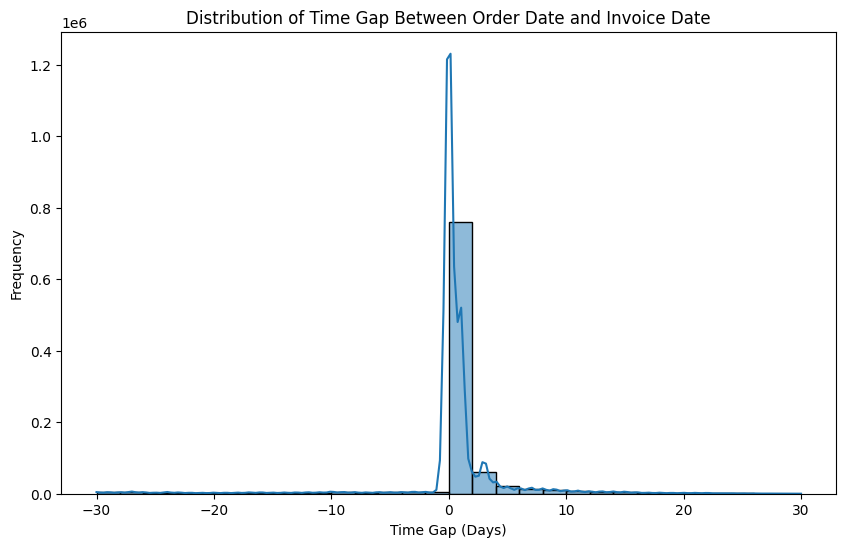

In [516]:
# Calculate time gap in days
data['Time_Gap_(Days)'] = (data['invoice_day'] - data['order_day'])

# Plotting the distribution of time gaps
plt.figure(figsize=(10, 6))
sns.histplot(data['Time_Gap_(Days)'], bins=30, kde=True)
plt.title("Distribution of Time Gap Between Order Date and Invoice Date")
plt.xlabel("Time Gap (Days)")
plt.ylabel("Frequency")
plt.show()


- Insight: Understanding the time taken between order placement and invoicing is crucial for optimizing cash flow and operational efficiency. As the result show most of orderd items are well manged with in 1 to 2 days. It is helpful for management can enhance operational efficiency, and increase the customer satifaction. 

### 2. Customer Retention Rate Analysis


In [517]:
# Show Customer count for Retention.
customer_count=data['customer_code'].value_counts()
customer_count

customer_code
234750001    28562
525200100     6037
471000829     4453
138845501     4136
901000100     4032
             ...  
158500100        1
306500200        1
253700100        1
413100200        1
455810100        1
Name: count, Length: 3899, dtype: int64

In [518]:
customer_count

customer_code
234750001    28562
525200100     6037
471000829     4453
138845501     4136
901000100     4032
             ...  
158500100        1
306500200        1
253700100        1
413100200        1
455810100        1
Name: count, Length: 3899, dtype: int64

In [519]:
## Define different category based on the purchase number times. 
data['Rentation_customer']=data['customer_code'].map(lambda x: 'High_frequent'
                                                      if customer_count[x] > 500
                                                      else 'Moderate'if 2<= customer_count[x] <= 20 else 'Saldom' )

In [520]:
data['Rentation_customer'].value_counts()

Rentation_customer
High_frequent    545144
Saldom           391092
Moderate           8257
Name: count, dtype: int64

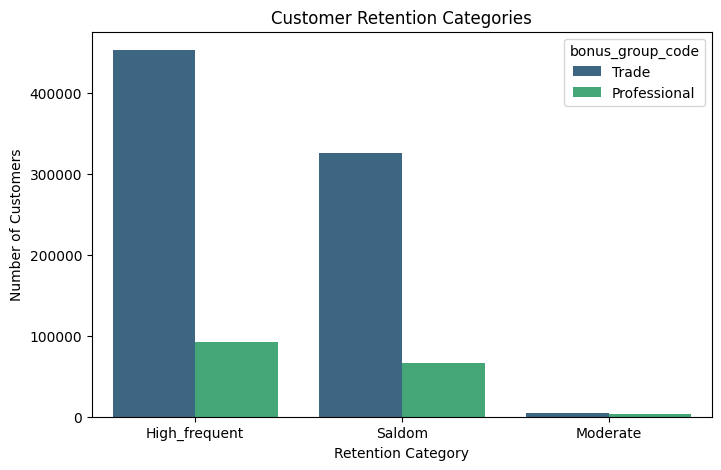

In [521]:
# Plot retention categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Rentation_customer', data=data, palette="viridis", hue='bonus_group_code')
plt.title("Customer Retention Categories")
plt.xlabel("Retention Category")
plt.ylabel("Number of Customers")
plt.show()

- Insights: Graph show that customer retention patterns is very strong in organization 545144 customer are highly relationship with company. It shows that retention patterns indicate a strong, positive relationship with company, while one-time customer might represent lost oppertunities. 

## 3. Sales Trends Analysis


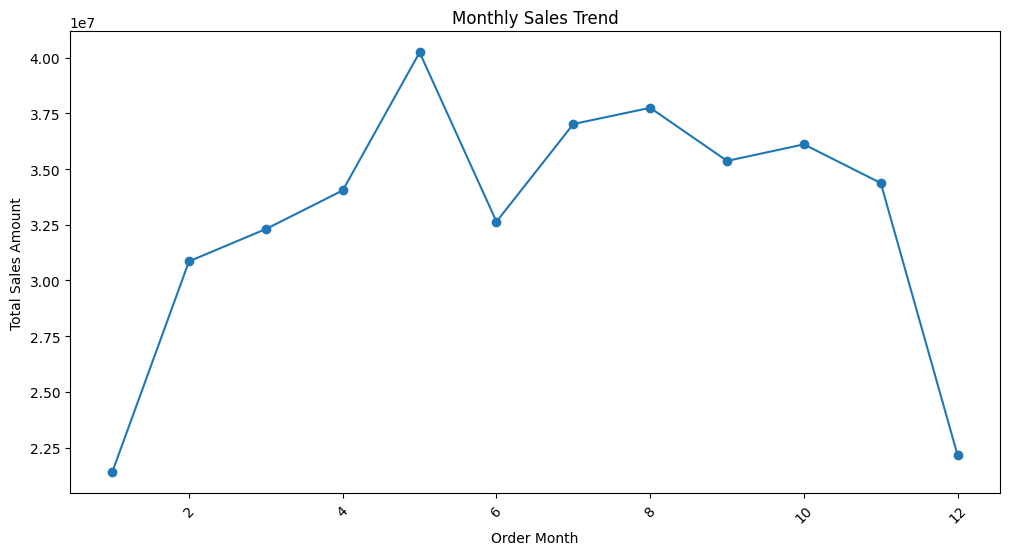

In [522]:
# Group the sales amount on the basis of month.
monthly_sales=data.groupby('order_month')['value_sales'].sum()
# Plotting the sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

In [523]:
data['value_sales'].sum()

394225572.6399999

- Insights: Graph shows that total sales amount high in mid-year where as low starting and ending of year. Tracking sales trends provides insights into seasonality and high-demand periods, helping management forcast invetory, and allocate resources effectively.

## 4. Sales Contribution by  level of the business chain.

In [524]:
data['value_sales']

0           -2.23
1            2.48
2           53.40
3           24.90
4           45.00
           ...   
951172     244.00
951173    1185.00
951174     232.19
951175      31.00
951176      37.44
Name: value_sales, Length: 944493, dtype: float64

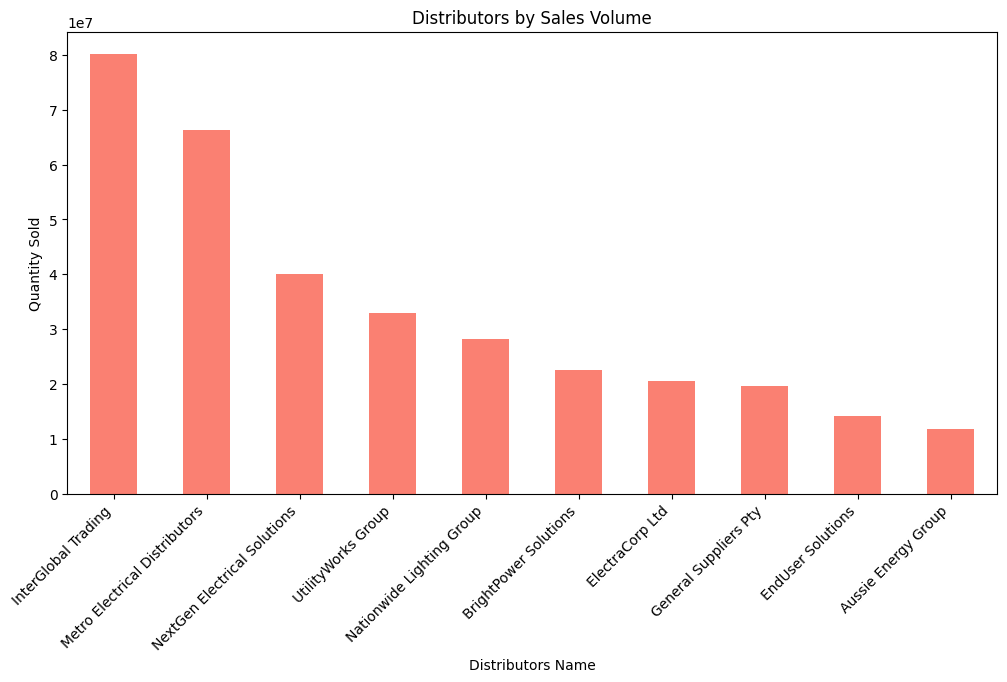

In [525]:
# Identify top 10 deal company by sales amount
top_products = data.groupby('business_chain_l1_name')['value_sales'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='salmon')
plt.title("Distributors by Sales Volume")
plt.xlabel("Distributors Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()


- Insights: Indentify the top company and understand product demand. knowing which company. Hight return rate with outer company indicate strong realtionship where as low return indicate issues with product qualitu, customer expectation, or product description.

In [526]:
data.columns

Index(['fiscal_year', 'fiscal_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'commission_group_code',
       'reporting_classification', 'light_source', 'warehouse_code',
       'abc_class_code', 'abc_class_volume', 'business_chain_l1_name',
       'salesperson_code', 'order_type_code', 'value_sales', 'value_cost',
       'value_quantity', 'value_price_adjustment', 'currency',
       'accounting_year', 'accounting_month', 'accounting_day', 'invoice_year',
       'invoice_month', 'invoice_day', 'order_year', 'order_month',
       'order_day', 'Time_Gap_(Days)', 'Rentation_customer'],
      dtype='object')

In [527]:
data['customer_district_code'].dtype

dtype('int64')

## 5. Impact of Currency on Profit Margins


In [528]:
# Calculate profit margins
data['Profit_margin'] = data['value_sales'] / data['value_cost']


In [529]:
data['Profit_margin']

0         1.755906
1         1.952756
2         2.324771
3         2.168045
4         1.599147
            ...   
951172    2.311482
951173    1.738939
951174    3.949380
951175    2.349375
951176    2.634764
Name: Profit_margin, Length: 944493, dtype: float64

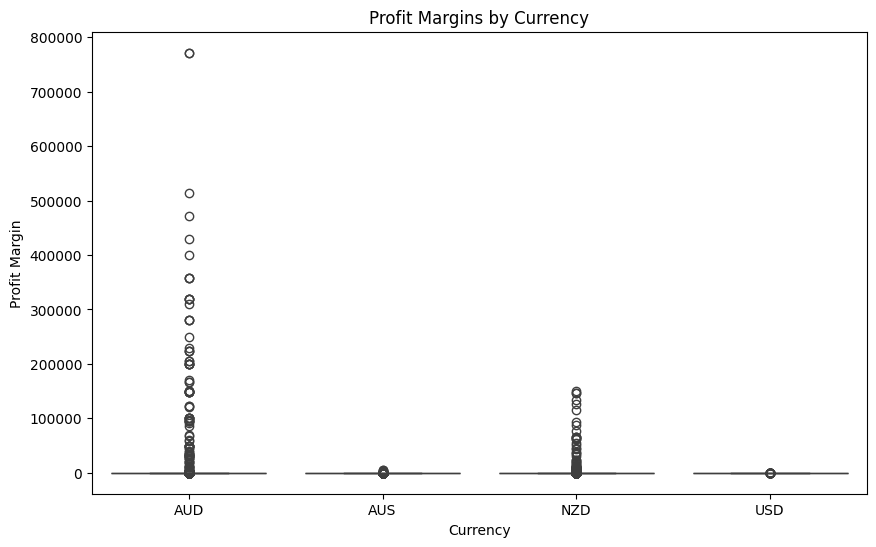

In [530]:
# Calculate profit margins
data['Profit_margin'] = data['value_sales'] / data['value_cost']

# Box plot of profit margins by currency
plt.figure(figsize=(10, 6))
sns.boxplot(x='currency', y='Profit_margin', data=data)
plt.title("Profit Margins by Currency")
plt.xlabel("Currency")
plt.ylabel("Profit Margin")
plt.show()


- Insights: Analyzing profit margins by currency provides insights into how international transaction affect profitibilit. most of transcation done in Australin doller, few in AUS and USD. Currency fluctuations or additional transction fees may imact margin.

# Section 3: Test Sub Sample Differences
- Develop two questions that require you to apply a two-sample test for each question and
run these tests and derive insights from the data.
For each question, provide a clear explanation of what is being tested, how it is being
tested, the results obtained, and why these results would be valuable for the management
team. (Not you may use the t-test even if using a larger sample than necessary)

In [531]:
# Load cleaned data.
data.head()

,fiscal_year,fiscal_month,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_type,bonus_group_code,...,accounting_day,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day,Time_Gap_(Days),Rentation_customer,Profit_margin
0,2013,7,205,471150112,400,10311,COM,COM90001,5,Trade,...,2013-01-25,2013,1,25,2013,1,25,0,High_frequent,1.755906
1,2013,11,205,277000801,200,10311,COM,COM90001,5,Trade,...,2013-05-13,2013,5,13,2013,5,10,3,High_frequent,1.952756
2,2013,12,205,292314701,200,10350,OTH,999,5,Trade,...,2013-06-11,2013,6,11,2013,6,11,0,High_frequent,2.324771
3,2013,7,205,299480703,200,10350,OTH,999,5,Trade,...,2013-01-11,2013,1,11,2013,1,11,0,High_frequent,2.168045
4,2013,9,205,471150015,400,10364,COM,COM03002,5,Trade,...,2013-03-21,2013,3,21,2013,3,20,1,High_frequent,1.599147


In [532]:
data[['business_area_code']][:5]

,business_area_code
0,COM
1,COM
2,OTH
3,OTH
4,COM


### Question 1: Is there a significant difference in average sales values between two business area , such as "COM" and "OTH"?

In [533]:
from  scipy.stats import ttest_ind

In [534]:
# Sales values for bussiness area "COM" and "OTH"
com_sales=data[data['business_area_code']=='COM']['value_sales']
oth_sales=data[data['business_area_code']=='OTH']['value_sales']

In [535]:
# Perform two-sample t-test for sales values
t_stat_sales, p_val_sales = ttest_ind(com_sales, oth_sales, equal_var=False)

In [536]:
t_stat_sales

5.71375065737122

In [537]:
p_val_sales

1.1075863798961674e-08

- Interpretation: With a p-value of 1.1075863798961674e-08, there is a statistically significant difference in average sales values between the "COM" and "OTH" business areas at the 5% significance level. This suggests that sales performance may vary notably between these areas.

- What is being tested: Aim to determine if the average sales value differ between the "COM"(commercial) and other bussiness area. It is essential as understanding whether one business are perfomes better than another in terms of sales. 

- Value for management: These results offer actionable insights into which business areas high revenue. Guiding management decisions.corrective actions be planned to boost sales. 

### Question 2: Is there a significant difference in average quantity sold between "CRR" and "NOR" order types?

In [538]:
data['order_type_code'].unique()

array(['CRR', 'NOR', 'CRD', 'PRO', 'CSH', 'PRD', 'PPO', 'EXP', 'PUP',
       'CDG', 'EDI', 'ZCR', 'NOS', 'NOH', 'AES', 'CPR', 'ZCG', 'SPC',
       'EDS', 'PMO', 'CRP', 'COP', 'PSA', 'SPL', 'MIN', 'COA', '5TN',
       'WDC', 'PPD', 'OBS', 'CSO', 'PME'], dtype=object)

In [539]:
# Question 2: # Filter data for the two order types
standard_quantity = data[data['order_type_code'] == 'CRR']['value_quantity']
express_quantity = data[data['order_type_code'] == 'NOR']['value_quantity']

# Perform two-sample t-test for quantity sold
t_stat_quantity, p_val_quantity = ttest_ind(standard_quantity, express_quantity, equal_var=False)

(t_stat_quantity, p_val_quantity) 

(-35.036166654086855, 1.6277872090278858e-262)

- Interpretation: Statistically significant difference in average qualities slod CRR versus NOR orders. for instance. if the average quality is higher for two orders types. 

- Why it is being tested: By testing difference in quantities slod between CRR and NOR orders. management gains insights into customer purchasing bahaviour based on delivery options. for example if customer tend to buy in bulk CRR orders. 

- For Management team: Understanding customer preferences. inventory and deand foreasting and strategic adjustments. 

# Section 4: Inference
- Develop two questions, with each question requiring you to apply multiple regression
analysis to examine the correlation between independent variables and a dependent
variable of your choice.
For each question, explain the method used, present the results, robustness evidence and
discuss why the insights are valuable for the management team.

### Question 1 How do fiscal_year, fiscal_month, item_type, customer district code and business area code impact value_sales?

In [540]:
df1=data[['business_area_code', 'value_cost','item_type', 'customer_district_code', 'value_sales']]
df1.head()

,business_area_code,value_cost,item_type,customer_district_code,value_sales
0,COM,-1.270,5,400,-2.23
1,COM,1.270,5,200,2.48
2,OTH,22.970,5,200,53.40
3,OTH,11.485,5,200,24.90
4,COM,28.140,5,400,45.00


In [541]:
# Check if any categorical encoding is necessary by inspecting data types and unique values
unique_values_q1 = {
    'item_type': data['item_type'].unique(),
    'customer_district_code': data['customer_district_code'].unique(),
    'business_area_code': data['business_area_code'].unique()
}

In [542]:
unique_values_q1

{'item_type': array([5, 7, 6, 4, 1, 9, 8, 2, 3]),
 'customer_district_code': array([400, 200, 510, 500, 310, 300, 410, 210, 600, 720, 710, 535, 530,
        540, 520, 545, 100]),
 'business_area_code': array(['COM', 'OTH', 'SUR', 'LMP', 'PEN', 'TRO', 'DLT', 'TAL', 'FLD',
        'URB', 'IAE', 'LCP', 'IAI', 'SAE', 'EXL', 'HLB', 'RWY'],
       dtype=object)}

In [543]:
from sklearn.preprocessing import LabelEncoder

In [544]:
encoding=LabelEncoder()

In [545]:
df1['business_area_code']=encoding.fit_transform(df1['business_area_code'])

/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/2704657724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['business_area_code']=encoding.fit_transform(df1['business_area_code'])


In [546]:
df1['business_area_code'].value_counts()

business_area_code
8     398958
13    187901
0      98745
9      80814
1      50689
3      43976
14     15308
15     15305
12     14687
16     11762
11      9414
4       8164
10      4334
7       3113
2       1140
6        134
5         49
Name: count, dtype: int64

- item_type and customer_district_code appear to be categorical with numeric codes.
Since they are already in a numeric format, we can proceed without further encoding.


<Axes: >

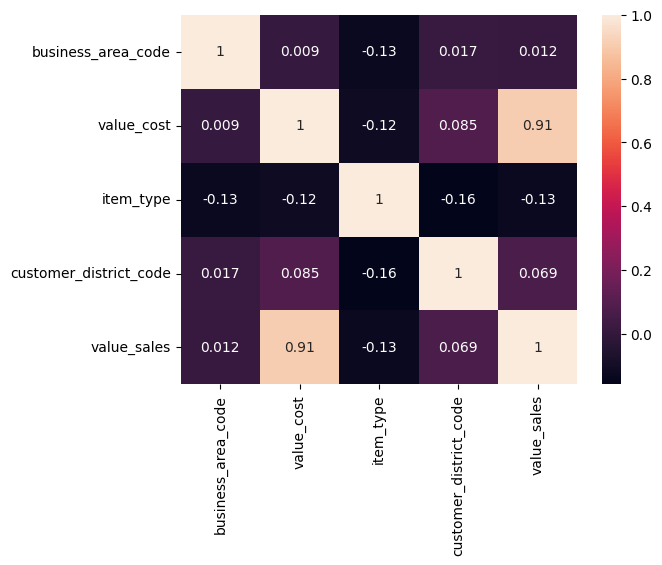

In [547]:
sns.heatmap(df1.corr(),annot=True)

- value_cost features have strong relationship values_sales, as the value cost of items increases the values of sales also increase. 

In [548]:
df1.describe()

,business_area_code,value_cost,item_type,customer_district_code,value_sales
count,944493.000000,944493.000000,944493.000000,944493.000000,944493.000000
mean,8.001449,275.692239,5.895558,384.834663,417.393853
std,4.273341,2316.809948,1.835870,151.936615,3125.091302
min,0.000000,-85008.000000,1.000000,100.000000,-793541.980000
25%,8.000000,9.149000,5.000000,300.000000,23.400000
50%,8.000000,30.991200,7.000000,400.000000,68.000000
75%,12.000000,102.560000,7.000000,500.000000,198.440000
max,16.000000,777669.200000,9.000000,720.000000,793541.980000


In [549]:
##  using the sklearn multilinear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score


In [550]:
# seprate dependent and independent features
x=df1[['business_area_code','value_cost','item_type','customer_district_code']]
y=df1['value_sales']

In [551]:
# Spliting train test data
x_train, x_test ,y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [552]:
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((708369, 4), (236124, 4), (708369,), (236124,))

In [553]:
# Initialize the regression model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [554]:
# Coffecient of regression model.
model.coef_

array([  0.47728101,   1.23528894, -44.71060049,  -0.28323909])

In [555]:
pred=model.predict(x_test)
pred

array([1714.19196605,  234.17651882,   75.29595902, ...,  216.17568279,
       1031.32742734,  201.30847808])

### Question 2: What is the relationship between fiscal month, accounting month and item type on value_quantity?
- These questions would allow us to explore how variations in time, item types, and customer details affect sales value and quantity.

- independent variable: value_quantity.
- Dependent variable: fiscal month, accounting month, item type.

In [598]:
df2=data[['fiscal_month', 'accounting_month', 'item_type','value_quantity']]

<Axes: >

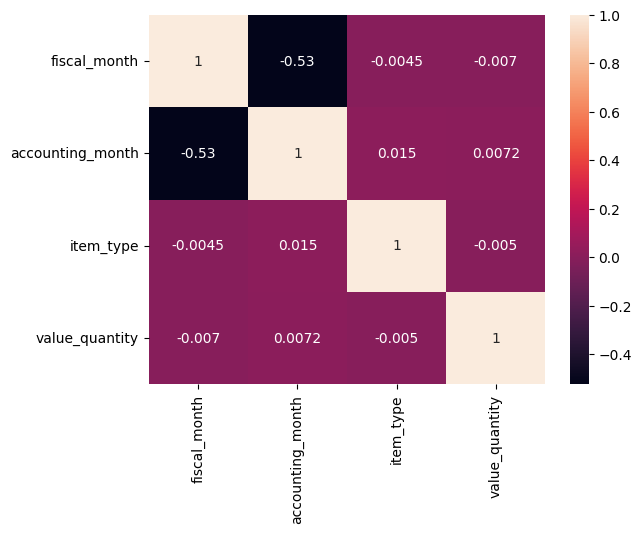

In [599]:
## Finding the correlation between dependent and independent variable
sns.heatmap(df2.corr(), annot=True)

In [600]:
# sepetating dependent and independent variable.
x=data[['fiscal_month', 'accounting_month', 'item_type','value_quantity']]
y=data['value_quantity']

In [601]:
# Split into train and test data
x_train, x_test ,y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [602]:
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((708369, 4), (236124, 4), (708369,), (236124,))

In [603]:
# Initialize the regression model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [604]:
# Coffecient of regression model.
model.coef_

array([-7.40466168e-14,  1.00808251e-13, -1.77999168e-13,  1.00000000e+00])

# Section 5: Prediction Model
Develop a prediction model that predicts the sales price in 2014.

In [556]:
## Data for sales price in 2014
data_14=data[data['fiscal_year']==2014]
data_14.head()

,fiscal_year,fiscal_month,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_type,bonus_group_code,...,accounting_day,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day,Time_Gap_(Days),Rentation_customer,Profit_margin
478027,2014,5,950,Z47000004,535,0.41150.73-906,COM,COM90001,6,Professional,...,2013-11-20,2013,11,20,2013,10,21,-1,Saldom,1.980591
478028,2014,3,101,234750001,720,0.79551.44-726,COM,COM90001,6,Professional,...,2013-09-02,2013,9,2,2013,9,2,0,High_frequent,1.028415
478029,2014,3,101,412300503,400,0.79551.44-726,COM,COM90001,6,Professional,...,2013-09-05,2013,9,5,2013,8,1,4,High_frequent,2.527941
478030,2014,5,101,234750001,720,1.1000.9.00721D,COM,COM90001,6,Professional,...,2013-11-19,2013,11,19,2013,11,19,0,High_frequent,1.010087
478031,2014,5,101,471000819,400,1.1000.9.00721D,COM,COM90001,6,Professional,...,2013-11-21,2013,11,21,2013,10,17,4,High_frequent,2.442833


In [557]:
data_14.columns

Index(['fiscal_year', 'fiscal_month', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'commission_group_code',
       'reporting_classification', 'light_source', 'warehouse_code',
       'abc_class_code', 'abc_class_volume', 'business_chain_l1_name',
       'salesperson_code', 'order_type_code', 'value_sales', 'value_cost',
       'value_quantity', 'value_price_adjustment', 'currency',
       'accounting_year', 'accounting_month', 'accounting_day', 'invoice_year',
       'invoice_month', 'invoice_day', 'order_year', 'order_month',
       'order_day', 'Time_Gap_(Days)', 'Rentation_customer', 'Profit_margin'],
      dtype='object')

In [558]:
# Numerical column
num_col=[col for col in data_14 if data[col].dtype!='O']

In [559]:
num_col

['fiscal_year',
 'fiscal_month',
 'company_code',
 'customer_district_code',
 'item_type',
 'value_sales',
 'value_cost',
 'value_quantity',
 'value_price_adjustment',
 'accounting_year',
 'accounting_month',
 'invoice_year',
 'invoice_month',
 'invoice_day',
 'order_year',
 'order_month',
 'order_day',
 'Time_Gap_(Days)',
 'Profit_margin']

In [560]:
data[num_col].corr()

,fiscal_year,fiscal_month,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,accounting_year,accounting_month,invoice_year,invoice_month,invoice_day,order_year,order_month,order_day,Time_Gap_(Days),Profit_margin
fiscal_year,1.000000,-0.890314,0.025914,0.030758,0.010545,0.004587,0.008088,0.008107,0.010302,NaN,0.855298,NaN,0.855298,-0.056412,0.076068,0.831198,-0.044783,-0.019977,0.003353
fiscal_month,-0.890314,1.000000,-0.016797,-0.025633,-0.004457,-0.002246,-0.005320,-0.007023,-0.019175,NaN,-0.525552,NaN,-0.525552,0.031158,-0.027919,-0.516621,0.021201,0.017023,-0.001497
company_code,0.025914,-0.016797,1.000000,0.231044,0.118677,-0.042103,-0.040693,-0.007749,-0.014686,NaN,0.029303,NaN,0.029303,0.020781,-0.000668,0.029429,0.006131,0.024927,0.002718
customer_district_code,0.030758,-0.025633,0.231044,1.000000,-0.158282,0.068519,0.084994,0.050983,-0.022478,NaN,0.028301,NaN,0.028301,0.016730,-0.015951,0.028904,0.012987,0.006422,-0.001950
item_type,0.010545,-0.004457,0.118677,-0.158282,1.000000,-0.130592,-0.116166,-0.005017,0.022859,NaN,0.014631,NaN,0.014631,-0.009276,0.072060,0.012437,-0.017559,0.013994,0.001263
value_sales,0.004587,-0.002246,-0.042103,0.068519,-0.130592,1.000000,0.908633,0.177061,-0.033130,NaN,0.006015,NaN,0.006015,0.019430,-0.044479,0.006571,0.018325,0.001965,-0.000185
value_cost,0.008088,-0.005320,-0.040693,0.084994,-0.116166,0.908633,1.000000,0.220227,-0.017689,NaN,0.009057,NaN,0.009057,0.019124,-0.036128,0.009211,0.018417,0.001289,-0.001029
value_quantity,0.008107,-0.007023,-0.007749,0.050983,-0.005017,0.177061,0.220227,1.000000,-0.011852,NaN,0.007155,NaN,0.007155,0.003339,0.000991,0.005213,-0.000299,0.006181,-0.000565
value_price_adjustment,0.010302,-0.019175,-0.014686,-0.022478,0.022859,-0.033130,-0.017689,-0.011852,1.000000,NaN,-0.002571,NaN,-0.002571,0.014894,0.012200,-0.001382,0.020717,-0.009798,NaN
accounting_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
## Column haveing high correlation with value_sales. 
# Value cost, Value_quantity, 

In [562]:
[col for col in data_14 if data[col].dtype=='O']

['customer_code',
 'item_code',
 'business_area_code',
 'item_group_code',
 'bonus_group_code',
 'environment_group_code',
 'commission_group_code',
 'reporting_classification',
 'light_source',
 'warehouse_code',
 'abc_class_code',
 'abc_class_volume',
 'business_chain_l1_name',
 'salesperson_code',
 'order_type_code',
 'currency',
 'accounting_day',
 'Rentation_customer']

In [563]:
data_14['business_area_code'].unique()

array(['COM', 'LMP', 'DLT', 'OTH', 'SUR', 'TAL', 'URB', 'IAE', 'FLD',
       'PEN', 'HLB', 'IAI', 'TRO', 'LCP', 'RWY', 'EXL', 'SAE'],
      dtype=object)

In [564]:
data_14['bonus_group_code'].unique()

array(['Professional', 'Trade'], dtype=object)

In [565]:
data_14['environment_group_code'].unique()

array(['P', 'C', 'S', 'R', 'Z', 'I', 'D'], dtype=object)

In [566]:
data_14['commission_group_code'].unique()

array(['NET_SALES', 'REBATE_EXEMPT_EOL', 'REBATE_EXEMPT_TP'], dtype=object)

In [567]:
data_14['reporting_classification'].unique()

array(['Continuing', 'Discontinuing'], dtype=object)

In [568]:
data_14['light_source'].unique()

array(['Accessories', 'Traditional', 'LED'], dtype=object)

In [569]:
data_14['warehouse_code'].unique()

array(['FA2', '1N0', '1Q0', '1N1', '5N2', 'Unk', '5W0', '1V0', '1W0',
       '1S1', '1Q1', '1S0', '5S0', '5Q0', '5V0', 'FA1', 'FWE', '5S1',
       '5N1', '5Q1', '5T0', 'FW2', 'FWA', '1T0', '1T1', 'EN0', 'BB1',
       '1N2', '1N3'], dtype=object)

In [570]:
data_14['currency'].unique()

array(['NZD', 'AUD', 'AUS', 'USD'], dtype=object)

In [571]:
from sklearn.preprocessing import LabelEncoder

In [572]:
# Encoding technique to convert category data into numberical.
encoding=LabelEncoder()
data_14['business_area_code']=encoding.fit_transform(data_14['business_area_code'])
data_14['bonus_group_code']=encoding.fit_transform(data_14['bonus_group_code'])
data_14['environment_group_code']=encoding.fit_transform(data_14['environment_group_code'])
data_14['commission_group_code']=encoding.fit_transform(data_14['commission_group_code'])
data_14['reporting_classification']=encoding.fit_transform(data_14['reporting_classification'])
data_14['light_source']=encoding.fit_transform(data_14['light_source'])
data_14['warehouse_code']=encoding.fit_transform(data_14['warehouse_code'])
data_14['currency']=encoding.fit_transform(data_14['currency'])

/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/591381407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_14['business_area_code']=encoding.fit_transform(data_14['business_area_code'])
/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/591381407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_14['bonus_group_code']=encoding.fit_transform(data_14['bonus_group_code'])
/var/folders/4c/smh5_57j6lxd0dns3y7skny80000gn/T/ipykernel_72388/591381407.py:5: SettingWithCo

In [573]:
data_14['business_area_code'].unique()

array([ 0,  8,  1,  9, 13, 14, 16,  5,  3, 10,  4,  6, 15,  7, 11,  2, 12])

In [574]:
data_14['light_source'].unique()

array([0, 2, 1])

In [575]:
cat_col=['value_sales','business_area_code','bonus_group_code','environment_group_code','commission_group_code','reporting_classification','light_source','warehouse_code','currency']

In [576]:
data_14[cat_col].corr()

,value_sales,business_area_code,bonus_group_code,environment_group_code,commission_group_code,reporting_classification,light_source,warehouse_code,currency
value_sales,1.000000,0.008414,-0.126089,0.053323,-0.007152,-0.019605,0.000475,-0.093309,0.023635
business_area_code,0.008414,1.000000,-0.043254,0.041290,0.038553,0.120505,0.095609,-0.013249,-0.015072
bonus_group_code,-0.126089,-0.043254,1.000000,-0.342361,0.007832,0.127357,0.121012,0.341331,-0.370175
environment_group_code,0.053323,0.041290,-0.342361,1.000000,-0.032759,0.027787,0.031590,0.209245,0.463480
commission_group_code,-0.007152,0.038553,0.007832,-0.032759,1.000000,-0.109940,-0.164763,-0.082790,-0.035514
reporting_classification,-0.019605,0.120505,0.127357,0.027787,-0.109940,1.000000,0.911984,0.042599,0.081297
light_source,0.000475,0.095609,0.121012,0.031590,-0.164763,0.911984,1.000000,0.032458,0.067143
warehouse_code,-0.093309,-0.013249,0.341331,0.209245,-0.082790,0.042599,0.032458,1.000000,0.192304
currency,0.023635,-0.015072,-0.370175,0.463480,-0.035514,0.081297,0.067143,0.192304,1.000000


- environment_group_code, currency,Value cost, Value_quantity features have high correation with value of sales. 

In [577]:
# Seprating dependent and independent variable
x=data_14[['environment_group_code','currency','value_cost','value_quantity']]
y=data_14['value_sales']

In [578]:
# Split into train and test
x_train, x_test,y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [579]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((352692, 4), (117564, 4), (352692,), (117564,))

In [580]:
# Decision Tree for Prediction model 
from sklearn.tree import DecisionTreeRegressor

In [581]:
# initialize the model
model=DecisionTreeRegressor()

In [582]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [583]:
y_pred=model.predict(x_test)

In [584]:
y_test

879828      45.60
711320     110.00
581406      40.16
575021       6.90
536798     360.00
           ...   
663450    1266.00
823751    3318.00
924576      59.00
691432      44.80
899939       0.00
Name: value_sales, Length: 117564, dtype: float64

In [585]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [586]:
mse=mean_squared_error(y_test, y_pred)
mse

1159152.5649441425

In [587]:
mae=mean_absolute_error(y_test, y_pred)
mae

112.45368060418947

# Section 6: Higher Likelihood of Losing Customers
- Identify features that result in a higher likelihood of losing customers (also known as
customer churn analysis).

#### To identify factor that may lead to customer churn, we can start by examining potential key features, such as: 
- Sales and cost Values: trends in sales and cost over time can reveal declining purchases or profitability. 
- Order and Invoice Dates: A gap decline in ordering frequency might indicate chrin rick.
- Customer and product codes : Identifying patterns by specific customers or products may hightlight common churn characteristics. 
- Customer Sagment and Geography: Columnns like customer_district_code colud helo in demographuc analysis of curn-porn segments.

In [588]:
# Convert data-related columns to datetime for analysis.
data['accounting_day']=pd.to_datetime(data['accounting_day'])
data['invoice_date'] = pd.to_datetime(data[['invoice_year', 'invoice_month', 'invoice_day']].astype(str).agg('-'.join, axis=1))
data['order_date'] = pd.to_datetime(data[['order_year', 'order_month', 'order_day']].astype(str).agg('-'.join, axis=1))


In [589]:
# Calculate summary statistics on sales trends by customer to understand purchasing behavior over time.
customer_sales_trends=data.groupby('customer_code').agg({
    'value_sales':['sum','mean','std'],
    'order_date':['min','max','nunique']
}).reset_index()

In [590]:
customer_sales_trends

customer_code value_sales                             order_date  \
                           sum          mean           std        min   
0        100050100  4800609.68  20170.628908  26341.557956 2013-04-22   
1        100210100     7041.62    782.402222    906.605395 2013-01-22   
2        100230100      448.92    448.920000           NaN 2013-04-09   
3        100250200    11514.85   2302.970000   2095.548297 2013-11-05   
4        100270100    90493.45   1064.628824   3543.885646 2013-03-12   
...            ...         ...           ...           ...        ...   
3894    ZI8009301      5470.00   1823.333333   2436.069238 2013-11-29   
3895    ZI8009401      3609.44    721.888000   1147.687162 2013-12-09   
3896    ZI9000101    228007.80    786.233793   1964.862751 2012-10-08   
3897    ZI9000102    833854.26    785.173503   2396.062825 2012-05-30   
3898    ZI9000103       803.25    401.625000    567.983522 2013-01-25   

                         
            max nunique  
0    2013-12-19      30  
1    2013-11-21       6  
2    2013-04-09       1  
3    2013-11-21       2  
4    2013-11-19      17  
...         ...     ...  
3894 2013-11-29       1  
3895 2013-12-09       1  
3896 2013-12-09      69  
3897 2013-12-19     110  
3898 2013-01-25       1  

[3899 rows x 7 columns]

## This analysis gives us the following insights for each customer. 
- Total Sales, Average Sales, and Sales Standard Deviation: we can use these metrics to sport customers with declining or highly variable sepending, which may indicate churn risk. 

- First and Last Order Dates: These date provides insights into customer activity and can help identify those who have no made recent purchases.
- Order Frequency: Lower order frequencies may indicate that a customer is becoming less engaged.